<a href="https://colab.research.google.com/github/anggraini1410/202255202025-Anggraini/blob/master/Tugas3_Jst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import semua library yang dibutuhkan
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns  # Untuk visualisasi tingkat tinggi
import tensorflow as tf  # Framework deep learning
from tensorflow.keras import datasets, layers, models  # Modul-modul inti Keras
from tensorflow.keras.utils import to_categorical  # Untuk mengubah label menjadi one-hot encoding
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Untuk evaluasi model

# Set seed untuk reproduksibilitas hasil
np.random.seed(42)
tf.random.set_seed(42)

# Load dan preprocess dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi data gambar ke rentang 0-1
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Ubah label menjadi one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def create_model(activation_function):
    """
    Creates and compiles a CNN model with the specified activation function.

    Args:
        activation_function: The activation function to use in the convolutional layers.

    Returns:
        A compiled CNN model.
    """

    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),

        # Flatten layer
        layers.Flatten(),

        # Dense layers
        layers.Dense(64, activation=activation_function),
        layers.Dense(10, activation='softmax')  # Output layer with softmax activation
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# List of activation functions to compare
activation_functions = ['linear', 'sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {}

In [ ]:
# Daftar fungsi aktivasi yang akan diuji
activation_functions = ['linear', 'sigmoid', 'tanh', 'relu', 'leaky_relu']

# Loop untuk setiap fungsi aktivasi
for activation in activation_functions:
    print(f"Training model with activation: {activation}")

    # Buat model secara khusus untuk leaky relu
    if activation == 'leaky_relu':
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Flatten(),
            layers.Dense(64),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Dense(10, activation='softmax')
        ])
    # Buat model dengan fungsi create_model untuk fungsi aktivasi lainnya
    else:
        model = create_model(activation)

    # Kompilasi model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Latih model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2, verbose=2)

    # Evaluasi model pada data testing
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

Training model with activation: linear


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 - 64s - 103ms/step - accuracy: 0.4637 - loss: 1.5293 - val_accuracy: 0.5540 - val_loss: 1.2875
Epoch 2/10
625/625 - 61s - 97ms/step - accuracy: 0.5703 - loss: 1.2413 - val_accuracy: 0.5911 - val_loss: 1.1911
Epoch 3/10
625/625 - 48s - 77ms/step - accuracy: 0.6049 - loss: 1.1442 - val_accuracy: 0.6062 - val_loss: 1.1577
Epoch 4/10
625/625 - 85s - 137ms/step - accuracy: 0.6285 - loss: 1.0807 - val_accuracy: 0.6207 - val_loss: 1.1301
Epoch 5/10
625/625 - 49s - 79ms/step - accuracy: 0.6465 - loss: 1.0321 - val_accuracy: 0.6228 - val_loss: 1.1193
Epoch 6/10
625/625 - 80s - 129ms/step - accuracy: 0.6600 - loss: 0.9931 - val_accuracy: 0.6210 - val_loss: 1.1205
Epoch 7/10
625/625 - 83s - 133ms/step - accuracy: 0.6729 - loss: 0.9567 - val_accuracy: 0.6212 - val_loss: 1.1288
Epoch 8/10
625/625 - 81s - 129ms/step - accuracy: 0.6849 - loss: 0.9248 - val_accuracy: 0.6230 - val_loss: 1.1420
Epoch 9/10
625/625 - 50s - 79ms/step - accuracy: 0.6944 - loss: 0.8960 - val_accuracy: 0.62

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
625/625 - 53s - 84ms/step - accuracy: 0.4339 - loss: 1.5540 - val_accuracy: 0.5429 - val_loss: 1.2799
Epoch 2/10
625/625 - 51s - 81ms/step - accuracy: 0.5786 - loss: 1.1926 - val_accuracy: 0.6126 - val_loss: 1.1033
Epoch 3/10
625/625 - 82s - 131ms/step - accuracy: 0.6392 - loss: 1.0272 - val_accuracy: 0.6464 - val_loss: 1.0189
Epoch 4/10
625/625 - 81s - 130ms/step - accuracy: 0.6775 - loss: 0.9163 - val_accuracy: 0.6753 - val_loss: 0.9505
Epoch 5/10
625/625 - 83s - 133ms/step - accuracy: 0.7090 - loss: 0.8316 - val_accuracy: 0.6851 - val_loss: 0.9281
Epoch 6/10
625/625 - 82s - 131ms/step - accuracy: 0.7328 - loss: 0.7615 - val_accuracy: 0.6918 - val_loss: 0.9269
Epoch 7/10
625/625 - 51s - 82ms/step - accuracy: 0.7534 - loss: 0.7049 - val_accuracy: 0.6889 - val_loss: 0.9480
Epoch 8/10
625/625 - 81s - 130ms/step - accuracy: 0.7718 - loss: 0.6542 - val_accuracy: 0.6941 - val_loss: 0.9486
Epoch 9/10
625/625 - 85s - 135ms/step - accuracy: 0.7889 - loss: 0.6101 - val_accuracy: 0.6

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


Text(0.5, 1.0, 'Training Accuracy for Different Activation Functions on CIFAR-10')

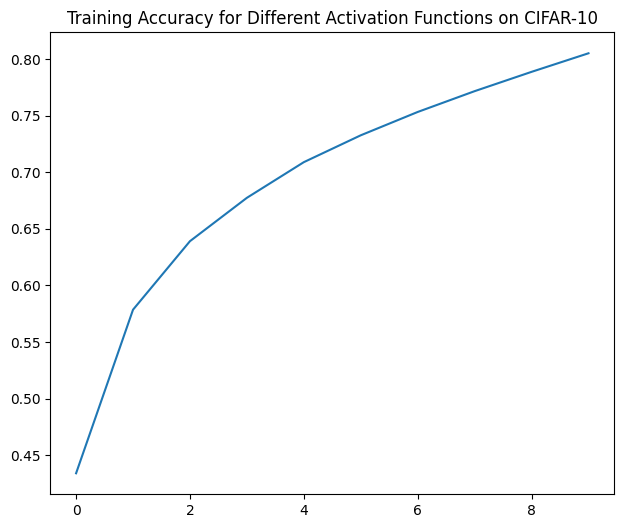

In [ ]:
# Simpan hasil pelatihan, evaluasi, dan matriks konfusi
y_pred = model.predict(test_images)  # Lakukan prediksi pada data testing
y_pred_classes = np.argmax(y_pred, axis=1)  # Ambil kelas dengan probabilitas tertinggi dari prediksi
y_true = np.argmax(test_labels, axis=1)  # Ambil kelas sebenarnya dari label testing
conf_matrix = confusion_matrix(y_true, y_pred_classes)  # Hitung matriks konfusi

# Simpan hasil ke dalam dictionary results
results[activation] = (history, test_loss, test_acc, conf_matrix)

# Plot hasil akurasi dan loss
plt.figure(figsize=(16, 6))  # Buat figure dengan ukuran 16x6

# Plot akurasi pelatihan
plt.subplot(1, 2, 1)  # Buat subplot pertama (1 baris, 2 kolom, posisi 1)
for activation, (history, _, _, _) in results.items():
    plt.plot(history.history['accuracy'], label=f'{activation} (train)')  # Plot akurasi pelatihan untuk setiap fungsi aktivasi
plt.title('Training Accuracy for Different Activation Functions on CIFAR-10')  # Beri judul plot

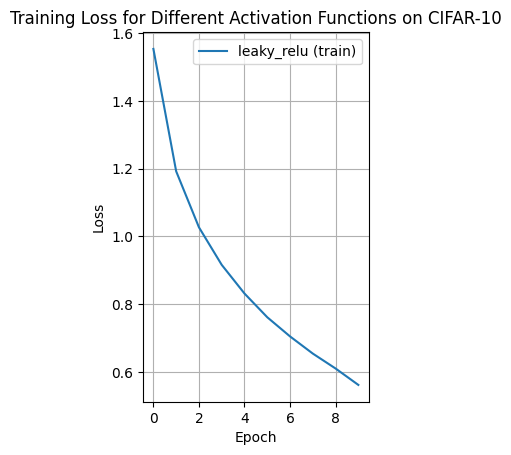


Test accuracy with leaky_relu: 0.6887


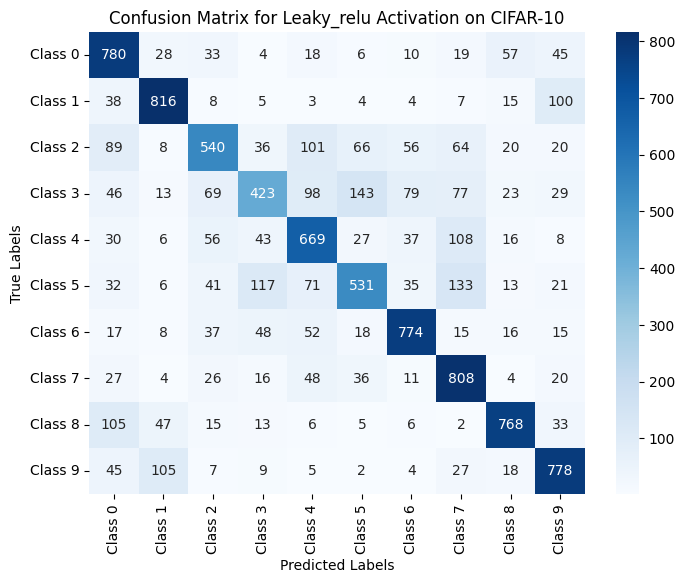

In [ ]:
# Plot training loss
plt.subplot(1, 2, 2)  # Buat subplot kedua (1 baris, 2 kolom, posisi 2)
for activation, (history, _, _, _) in results.items():
    plt.plot(history.history['loss'], label=f'{activation} (train)')  # Plot loss pelatihan untuk setiap fungsi aktivasi
plt.title('Training Loss for Different Activation Functions on CIFAR-10')  # Beri judul plot
plt.ylabel('Loss')  # Beri label sumbu y
plt.xlabel('Epoch')  # Beri label sumbu x
plt.legend()  # Tampilkan legenda
plt.grid(True)  # Tampilkan grid
plt.show()  # Tampilkan plot

# Display confusion matrix for each activation function
for activation, (_, _, test_acc, conf_matrix) in results.items():
    print(f'\nTest accuracy with {activation}: {test_acc:.4f}')  # Cetak akurasi testing

    plt.figure(figsize=(8, 6))  # Buat figure baru untuk matriks konfusi
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Class {i}' for i in range(10)],  # Label sumbu x
                yticklabels=[f'Class {i}' for i in range(10)])  # Label sumbu y
    plt.title(f'Confusion Matrix for {activation.capitalize()} Activation on CIFAR-10')  # Beri judul plot
    plt.xlabel('Predicted Labels')  # Label sumbu x
    plt.ylabel('True Labels')  # Label sumbu y
    plt.show()  # Tampilkan plot